# Intro to Pandas and Matplotlib Part II

## Quiz 5 Answers

Question 1

In [1]:
def func1(x):
    return(x*x)
def func2(x):
    return(x*x*x)
def func3(x):
    return(func1(x), func2(x))
print(list(map(func3, range(1,3)))) 

[(1, 1), (4, 8)]


Question 2

In [2]:
print(sum(filter(lambda x: x>3 and x<7, range(1,10))))

15


Question 3

In [3]:
from functools import reduce
x = [[1,3], [5,7], [6,4]]
print(reduce(min, map(max,x)))

3


Remember after activating your environment, to install pandas and matplotlib.

In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

## Background

Last class period, we filtered a dataset for q-values and fold-change.  Today, we want to explore some additional features of the dataset that were unexplored by the authors.  Mainly if there are patterns in cis-regulatory features in the mRNAs selected by the authors.  Remember, how I said that selected mRNAs were from an experiment where the authors over-expressed a protein.  Well, without diving into the intricacies of this particular field of research, this protein is believed to regulate mRNAs via their 5'UTR.  In other studies, reasearchers have found that these mRNAs had GC-rich 5'UTRs or overly long UTRs.  Today we are going to see if any of those patterns hold-up in this mRNA set.

## Review

I have given you two datasets, one dataset is the original supplemental table from last week, the other dataset was downloaded from UCSC table browser (and then sort of cleaned up) and includes the 5'UTR length and GC content of genes.

In [5]:
genelist = pd.read_table('Supplement_table02.txt', sep='\t', index_col=0)

In [6]:
genelist.head()


,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_130786,1.0,A1BG,alpha-1-B glycoprotein,2.176788,1.998233,NaN
NM_015665,8086.0,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1.952652,3.753678,NaN
NM_001087,14.0,AAMP,"angio-associated, migratory cell protein",2.808783,0.637618,NaN
NM_025267,80755.0,AARSD1,alanyl-tRNA synthetase domain containing 1,1.962436,9.865391,NaN
NM_012089,23456.0,ABCB10,"ATP-binding cassette, sub-family B (MDR/TAP), ...",0.225564,1.707905,-4.433328


### Your Turn

Pull out rows where the gene symbol is 'ACOT7'.  Create a mask to isolate rows that evaulate true for ACOT7.

In [7]:
my_mask = genelist.ix[:,'Gene symbol'] == 'ACOT7'
my_mask

NM_130786                  False
NM_015665                  False
NM_001087                  False
NM_025267                  False
NM_012089                  False
NM_007189                  False
NM_005692                  False
NM_015407                  False
NM_020676                  False
NM_005759                  False
NM_014945                  False
NM_013375                  False
NM_005891                  False
NM_022914                  False
NM_181865                   True
NM_181866                   True
NM_181864                   True
NM_007274                   True
NM_004300                  False
NM_177554                  False
NM_007099                  False
NM_203372                  False
NM_004457                  False
NM_005736                  False
NM_005735                  False
NM_020445                  False
NM_000666                  False
NM_001107                  False
NM_138448                  False
NM_000022                  False
          

Use the mask you create and index into the genelist dataframe.

In [8]:
genelist.ix[my_mask,:]

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_181865,11332.0,ACOT7,acyl-CoA thioesterase 7,1.953817,8.27025,NaN
NM_181866,11332.0,ACOT7,acyl-CoA thioesterase 7,1.953817,8.27025,NaN
NM_181864,11332.0,ACOT7,acyl-CoA thioesterase 7,1.953817,8.27025,NaN
NM_007274,11332.0,ACOT7,acyl-CoA thioesterase 7,1.953817,8.27025,NaN


## Axis attributes and Groupby

Notice how there are multiple rows where the gene name is the same?  We are going to average those rows this time using the groupby method.  First we are going to play with the axis attribute for mean and then apply only to genes that have the same name.

In [9]:
test_frame = pd.DataFrame([{'a':1, 'b':2, 'c':3}, {'a':2, 'b':4, 'c':6}])
test_frame

,a,b,c
0,1,2,3
1,2,4,6


If we are to take the means of the dataframe, we can either do this row or column wise using the axis arguement.  Axis 0 calculates along the rows, axis 1 calculates along the columns. This statement is confusing as hell, so I refer you to stack overflow for a nice explanation. [axis definition in pandas](http://stackoverflow.com/questions/22149584/what-does-axis-in-pandas-mean) 

![axis](Screen Shot 2016-10-05 at 12.32.56 PM.png)

In [10]:
test_frame.mean(axis=0)


a    1.5
b    3.0
c    4.5
dtype: float64

In [11]:
test_frame.mean(axis=1)

0    2.0
1    4.0
dtype: float64

If I want to filter my genelist dataframe so that I keep only rows that have more than 2 non-null values, how would I go about doing it?

Step 1: Check out the count method to return the count of non-null (aka anything that's not NaN) item across rows.  You will have to use the correct axis in order to return rows.

In [12]:
genelist.count(axis=1)

NM_130786                  5
NM_015665                  5
NM_001087                  5
NM_025267                  5
NM_012089                  6
NM_007189                  5
NM_005692                  5
NM_015407                  6
NM_020676                  6
NM_005759                  5
NM_014945                  5
NM_013375                  5
NM_005891                  5
NM_022914                  5
NM_181865                  5
NM_181866                  5
NM_181864                  5
NM_007274                  5
NM_004300                  5
NM_177554                  5
NM_007099                  5
NM_203372                  6
NM_004457                  6
NM_005736                  5
NM_005735                  5
NM_020445                  5
NM_000666                  5
NM_001107                  5
NM_138448                  5
NM_000022                  5
                          ..
NM_021906                  3
NM_145323                  3
XM_039627                  3
NM_016496     

Step2: Use your answer from step 1 and create a boolean mask to pick out rows that are greater than 2 counts.

In [13]:
mask2 = genelist.count(axis=1)>2
mask2

NM_130786                   True
NM_015665                   True
NM_001087                   True
NM_025267                   True
NM_012089                   True
NM_007189                   True
NM_005692                   True
NM_015407                   True
NM_020676                   True
NM_005759                   True
NM_014945                   True
NM_013375                   True
NM_005891                   True
NM_022914                   True
NM_181865                   True
NM_181866                   True
NM_181864                   True
NM_007274                   True
NM_004300                   True
NM_177554                   True
NM_007099                   True
NM_203372                   True
NM_004457                   True
NM_005736                   True
NM_005735                   True
NM_020445                   True
NM_000666                   True
NM_001107                   True
NM_138448                   True
NM_000022                   True
          

Step3: index into the genelist dataframe with your boolean mask from step 2 and save the object as filtered for the object variable name. 

In [14]:
genelist.ix[mask2,:]

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_130786,1.0,A1BG,alpha-1-B glycoprotein,2.176788,1.998233,NaN
NM_015665,8086.0,AAAS,"achalasia, adrenocortical insufficiency, alacr...",1.952652,3.753678,NaN
NM_001087,14.0,AAMP,"angio-associated, migratory cell protein",2.808783,0.637618,NaN
NM_025267,80755.0,AARSD1,alanyl-tRNA synthetase domain containing 1,1.962436,9.865391,NaN
NM_012089,23456.0,ABCB10,"ATP-binding cassette, sub-family B (MDR/TAP), ...",0.225564,1.707905,-4.433328
NM_007189,10061.0,ABCF2,"ATP-binding cassette, sub-family F (GCN20), me...",2.226917,8.039531,NaN
NM_005692,10061.0,ABCF2,"ATP-binding cassette, sub-family F (GCN20), me...",2.661841,8.727441,NaN
NM_015407,25864.0,ABHD14A,abhydrolase domain containing 14A,0.462046,9.428327,-2.164288
NM_020676,57406.0,ABHD6,abhydrolase domain containing 6,0.394502,8.039531,-2.534839
NM_005759,10152.0,ABI2,abl interactor 2,1.621564,7.653744,NaN


## Groupby

In [15]:
genelist.groupby('Gene symbol')

Groupby returns an object and in order to view the object, you can use the groups attribute which returns a dictionary whose keys are unique values and whose dictionary values are the axis labels belonging to each group.

In [16]:
genelist.groupby('Gene symbol').groups

{'C1orf33': ['NM_016183'],
 'DECR2': ['NM_020664'],
 'RBM25': ['NM_021239'],
 'UBE2M': ['NM_003969'],
 'COQ2': ['NM_015697'],
 'ZBTB8OS': ['NM_178547'],
 'TMEM136': ['NM_174926'],
 'USP52': ['NM_014871'],
 'EXOSC9': ['NM_005033'],
 'ZNF462': ['NM_021224'],
 'CNOT7': ['NM_054026'],
 'ARIH2': ['NM_006321'],
 'SDCCAG3': ['NM_006643'],
 'AKR1B10': ['NM_020299'],
 'BMP2': ['NM_001200'],
 'NME1-NME2': ['NM_001018136'],
 'AHR': ['NM_001621'],
 'PPP4R1': ['NM_005134'],
 'ANKRD13B': ['NM_152345'],
 'BCL2L12': ['NM_138639', 'NM_052842'],
 'MRPL43': ['NM_176792', 'NM_176794', 'NM_176793', 'NM_032112'],
 'PRKCBP1': ['NM_183048', 'NM_183047', 'NM_012408'],
 'LRRC37B': ['NM_052888'],
 'NOTCH2NL': ['NM_203458'],
 'CRLS1': ['NM_019095'],
 'DVL3': ['NM_004423'],
 'POLD1': ['NM_002691'],
 'RPL26L1': ['NM_016093'],
 'PSMB7': ['NM_002799'],
 'KIAA0195': ['NM_014738'],
 'NDUFB7': ['NM_004146'],
 'PHF5A': ['NM_032758'],
 'CEP350': ['NM_014810'],
 'RPL36': ['NM_015414', 'NM_033643'],
 'CYYR1': ['NM_052954'],

Once you've created a groupby object, you can use methods only on the groups.

In [17]:
genelist.ix[genelist['Gene symbol']=='ACOT7',:]

,Geneid,Gene symbol,Gene name,Fold Change,q-value (%),Negative Fold Change
NM_181865,11332.0,ACOT7,acyl-CoA thioesterase 7,1.953817,8.27025,NaN
NM_181866,11332.0,ACOT7,acyl-CoA thioesterase 7,1.953817,8.27025,NaN
NM_181864,11332.0,ACOT7,acyl-CoA thioesterase 7,1.953817,8.27025,NaN
NM_007274,11332.0,ACOT7,acyl-CoA thioesterase 7,1.953817,8.27025,NaN


In [18]:
condensed = genelist.groupby('Gene symbol').mean()
condensed

,Geneid,Fold Change,q-value (%),Negative Fold Change
Gene symbol,,,,
A1BG,1.0,2.176788,1.998233,NaN
AAAS,8086.0,1.952652,3.753678,NaN
AAMP,14.0,2.808783,0.637618,NaN
AARSD1,80755.0,1.962436,9.865391,NaN
ABCB10,23456.0,0.225564,1.707905,-4.433328
ABCF2,10061.0,2.444379,8.383486,NaN
ABHD14A,25864.0,0.462046,9.428327,-2.164288
ABHD6,57406.0,0.394502,8.039531,-2.534839
ABI2,10152.0,1.621564,7.653744,NaN


Shows that Gene symbol is the new index.

In [19]:
condensed.ix['ACOT7',:]

Geneid                  11332.000000
Fold Change                 1.953817
q-value (%)                 8.270250
Negative Fold Change             NaN
Name: ACOT7, dtype: float64

## Merging two dataframes

We want to look at the UTRs of genes that are in our genelist.  We also want to see if our selected genes have UTRs that are different from the rest of the genelist.

There are many ways to smoosh together two dataframes (or more).  I will refer you to the documents which have pictures and stuff for all of the different ways to perform this operation [merge join concat](http://pandas.pydata.org/pandas-docs/stable/merging.html).  Today we will cover merging.

There are 4 types of merging in pandas, outer, inner, right, and left.

![merging](merge_methods.png)

We are interested in an inner join, where only the genes in common between the two dataframe will be kept, all others will be discarded.  So first we need to find at least one column in each dataframe that both dataframes have in common to merge on. And then we need to decide what arguements to geive the merge function, and by that I mean how to tell it which columns to merge on.

In [20]:
features = pd.read_table('longest_isoform_length_GC_UTR.txt', sep='\t', index_col=0)

In [21]:
features.shape

(10922, 20)

In [22]:
features.head()

,UTR_len,#hg19.refGene.name,hg19.refGene.txStart,hg19.refGene.txEnd,hg19.refGene.cdsStart,hg19.refGene.cdsEnd,hg19.refGene.exonCount,hg19.kgXref.kgID,hg19.kgXref.geneSymbol,hg19.kgXref.refseq,hg19.kgXref.protAcc,hg19.foldUtr3.name,hg19.foldUtr3.seq,hg19.foldUtr3.fold,hg19.foldUtr3.energy,hg19.foldUtr5.name,hg19.foldUtr5.seq,hg19.foldUtr5.fold,hg19.foldUtr5.energy,GC_content
hg19.refGene.name2,,,,,,,,,,,,,,,,,,,,
A1CF,400.0,NM_001198819,52559168.0,52645435.0,52566488.0,52610547.0,15.0,uc010qho.2,A1CF,NM_001198819,NP_001185748,uc010qho.2,AGAUGCUUUUUUAAAUUUAAGAAUAAGACACACAAAACUCUAUUAA...,.((((.(((((.((((((..((((((((.....................,-1788.82,uc010qho.2,UUUGAUAUGACGAUUAGAGCAUAACCCGAGUGACACGUUGAAUUCG...,.((((((((.(((((((..(((.......))).....))))..)))...,-105.3,42.750000
A4GNT,202.0,NM_016161,137842559.0,137851229.0,137843105.0,137850098.0,3.0,uc003ers.2,A4GNT,NM_016161,NP_057245,uc003ers.2,AGCUAACACUCGUUUGCUGCUGCUGCAGUGUGGAAAUGGACAUUUC...,......(((((....(((((....)))))..((((((....)))))...,-151.4,uc003ers.2,AUUUCUAAGACCUCAAAUACUGGUUAACUGCAUUUGCAGCUAGAAG...,..........((((.....((((....((((....))))))))......,-52.1,41.089109
AADAC,90.0,NM_001086,151531860.0,151546276.0,151531950.0,151545960.0,5.0,uc003eze.3,AADAC,NM_001086,NP_001077,uc003eze.3,UAAAACAUGUAGCUAUAACAUAUUUUAAAAAUAAAAUCUGAAAACC...,...........(((...((((.((((.(((((((.....(((((.(...,-58.17,uc003eze.3,AAGCACACUGCUUAUUAAAGUACACUAUUCAGGCAUAUCAUGUAGG...,.(((...((((((...((((((.(((...((.........))..))...,-13.9,41.111111
AADACL2,120.0,NM_207365,151451703.0,151475556.0,151451823.0,151475382.0,5.0,uc003ezc.3,AADACL2,NM_207365,NP_997248,uc003ezc.3,AUAUGUGAUGUGUAUGUAUAGCCCUUACAUAGUGGAUUGUAAUUUG...,(((.(((.(((.((((((.......))))))(((((((((((((((...,-32.8,uc003ezc.3,UUAAGAUGAUCAUAUCACCUGAGAGAGUUCCCAAGUCUACAAUUGC...,...........(((((.(((...(((((................))...,-19.99,34.166667
AADACL3,62.0,NM_001103170,12776117.0,12788726.0,12776179.0,12785963.0,4.0,uc009vnn.1,AADACL3,NM_001103170,NP_001096640,uc009vnn.1,CCAUCUUUCUUCUCUGCUGGUACUGCGGUGUGGAUUCCACUGGCAU...,.......(((.(.((((.......)))).).)))..((((((((.....,-982.9,uc009vnn.1,AUGUCCUAAAUGGUUUCCACUGCGCACAGCUUCCUCUCAGCCCGCU...,...........((((.(((((((.....((((((.(((((.........,-78.46,56.451613


In [23]:
condensed.shape

(2244, 4)

In [24]:
condensed.index

Index(['A1BG', 'AAAS', 'AAMP', 'AARSD1', 'ABCB10', 'ABCF2', 'ABHD14A', 'ABHD6',
       'ABI2', 'ABLIM3',
       ...
       'ZNF91', 'ZNHIT1', 'ZNHIT4', 'ZNRD1', 'ZP3', 'ZP4', 'ZRANB3', 'ZXDA',
       'ZXDC', 'ZYX'],
      dtype='object', name='Gene symbol', length=2244)

In [25]:
features.index

Index(['A1CF', 'A4GNT', 'AADAC', 'AADACL2', 'AADACL3', 'AADAT', 'AAED1',
       'AAK1', 'AAMDC', 'AAMP',
       ...
       'ZUFSP', 'ZW10', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B',
       'ZYX', 'ZZZ3'],
      dtype='object', name='hg19.refGene.name2', length=10922)

In [26]:
top_genes = pd.merge(condensed, features, how = 'inner', left_index = True, right_index=True)

In [27]:
top_genes

,Geneid,Fold Change,q-value (%),Negative Fold Change,UTR_len,#hg19.refGene.name,hg19.refGene.txStart,hg19.refGene.txEnd,hg19.refGene.cdsStart,hg19.refGene.cdsEnd,...,hg19.kgXref.protAcc,hg19.foldUtr3.name,hg19.foldUtr3.seq,hg19.foldUtr3.fold,hg19.foldUtr3.energy,hg19.foldUtr5.name,hg19.foldUtr5.seq,hg19.foldUtr5.fold,hg19.foldUtr5.energy,GC_content
AAMP,14.0,2.808783,0.637618,NaN,123.0,NM_001087,219128851.0,219134932.0,219129255.0,219134809.0,...,"NP_001078,","uc002vhk.3,uc002vhl.3,",UGGCUGCAGCCCCUGCCUGUGUGUCUGGUGUUGAGGGGACGAAGGG...,.((((...((((((((((.((...((((((...(((((....(((....,"-159.8,","uc002vhk.3,uc002vhl.3,",AGGGGCUCGAGUUCCGCGUCGUCGCGCAGAGCUGACUCUGGGAGGC...,.((.((...(((((.((((....)))).)))))..(((((((.......,"-33.3,",69.105691
ABCB10,23456.0,0.225564,1.707905,-4.433328,43.0,NM_012089,229652328.0,229694442.0,229653925.0,229694399.0,...,NP_036221,uc001htp.4,GGAAGCAAUUACUGGUAAACAAUAUGAGACUUUAAUGCAAAACAGU...,....((((((...((((...((((((.((.(((((((......(((...,-358.29,uc001htp.4,CGCCUGGCCGGCGGGCUGAGGCGUACGGGUCGCACGCAGCGCC,(((((((((....)))).)))))....((.(((.....))))),-18.4,81.395349
ABCF2,10061.0,2.444379,8.383486,NaN,254.0,NM_007189,150908569.0,150924460.0,150911139.0,150923544.0,...,NP_009120,uc003wjp.3,GCCCUCUACCUGGGUUCGGGUCAGGAGCUCCAUCUGGGAACUAACA...,((((....(((((((...((((((((((.....(((........))...,-594.9,uc003wjp.3,UGAGCCGGCCGCACGCGGAGGAUCCUAAGGAGCAGCUCUGUUGCGA...,.((((.((((...(((.(.((..((((.(..(((((...))))).....,-36.9,63.385827
ABHD14A,25864.0,0.462046,9.428327,-2.164288,110.0,NM_015407,52009041.0,52015216.0,52009151.0,52015034.0,...,"NP_056222,","uc003dco.3,uc010hlz.2,",ACUAACCCACUCCCAGCUCCCAGCCUGGCAUGAGCUUGGACAGUCU...,.......(((((((.((.....))..((((.((((((((...((((...,"-66.7,-191.1,","uc003dco.3,uc010hlz.2,",CUCGGUAACUGGGUUGCAGGCCCGCGGCUGCGGAGUGCGCAGGCGC...,...(((..((((((.(((((..(((((((.(((.((((....))))...,"-58.2,",77.272727
ABHD6,57406.0,0.394502,8.039531,-2.534839,440.0,NM_020676,58223228.0,58280463.0,58242313.0,58279492.0,...,"NP_065727,","uc003djs.4,uc003djt.4,",GGCCCCGACUGCAGCCUGCAUUCUGCACACAGCAUCUGCUCCCAUC...,(((((((((((((....(((...(((.....)))..)))..........,"-277.21,","uc003djs.4,uc003djt.4,",ACCUCUGUAGGCGAUCCUGCUCUCGCCGUGGCUUUCGGGUGCUAGG...,.(((....)))....(((((((.((((..(((((((((...((((....,"-216.8,-239.74,",72.272727
ABI2,10152.0,1.621564,7.653744,NaN,276.0,NM_005759,204192961.0,204296896.0,204193237.0,204292075.0,...,"NP_005750,","uc002uzz.3,uc002vaa.3,uc010zii.2,uc010zil.2,uc...",AGCUCAGCAGGGCUGUGCUUGCCUCACAGGAAUAGUCAGGUCUUCC...,((((((((((((((..((((((......(((((..((((((((((....,"-1371.21,","uc002uzz.3,uc002vaa.3,uc010zii.2,uc010zil.2,uc...",GCGCGUGCGCGCGCCCGGCCGGCCGUCGCCGCGGUGACCGUCCUCG...,(((((....)))))..(((.((.(((.(((((((...(((....))...,"-109.7,-39.1,",73.913043
ABLIM3,22885.0,2.205244,4.611046,NaN,259.0,NM_014945,148521045.0,148640001.0,148521658.0,148637967.0,...,"NP_055760,","uc003lpy.2,uc003lpz.1,uc003lqb.3,uc003lqc.1,uc...",GCAGAGGCUCUAUAAAUAUAUAUGCAUUUAUAUAAAGAUAUAUGUA...,(((((((((((.....((((((((..(((....)))..))))))))...,"-679.18,-286.55,-679.18,-286.55,","uc003lpy.2,uc003lpz.1,uc003lqb.3,uc003lqc.1,uc...",GCGCCCCCUGCGCUGCCAACCCGCGAGCCCGCAUCAUGGAUGUCGA...,..(((((..(.(((((.......(((((((((.((((((((....(...,"-86.29,-218.2,-21.1,",60.231660
ABT1,29777.0,3.284837,0.637618,NaN,40.0,NM_013375,26597170.0,26600277.0,26597210.0,26598873.0,...,NP_037507,uc003nii.3,GGGCCUGGGUGGCCCCUUCCAUUUCCUGGCCCUGCUCUGCUUCCUG...,.((((((.((((((((((((((..(((.....(((((((((...((...,-427.21,uc003nii.3,AAGGCACUUUACGGCCGUCGUGCCGCUCGUGUCAGUCAAC,..(((((....((((......))))...))))).......,-12,60.000000
ACAT2,39.0,1.664480,8.593663,NaN,131.0,NM_005891,160182988.0,160200087.0,160183119.0,160199861.0,...,"NP_005882,","uc010kjy.3,uc011efw.2,",AUUGCUUAAACUUUGAACAACCUCAAUUUCUUUUUAAACUAAUAAA...,............((((......)))).(((((((((...((((((....,"-33.16,","uc010kjy.3,uc011efw.2,",GGUGCGCGGGGAGGUGGAGGGCGAGGGGCGGGGCUACCUCAGGUCC...,..(((((............(.((..((((((((((......)))))...,"-61.4,-66.4,",73.282443
ACOT7,11332.0,1.953817,8.270250,NaN,367.0,NM_0072

In [28]:
top_genes.shape

(1060, 24)

What happend if we do an outer merge? Redo the previous command and see what happens when you give the how arguement 'outer'.

In [29]:
top_genes2 = pd.merge(condensed, features, how = 'outer', left_index = True, right_index=True)
top_genes2.head()

,Geneid,Fold Change,q-value (%),Negative Fold Change,UTR_len,#hg19.refGene.name,hg19.refGene.txStart,hg19.refGene.txEnd,hg19.refGene.cdsStart,hg19.refGene.cdsEnd,...,hg19.kgXref.protAcc,hg19.foldUtr3.name,hg19.foldUtr3.seq,hg19.foldUtr3.fold,hg19.foldUtr3.energy,hg19.foldUtr5.name,hg19.foldUtr5.seq,hg19.foldUtr5.fold,hg19.foldUtr5.energy,GC_content
A1BG,1.0,2.176788,1.998233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CF,NaN,NaN,NaN,NaN,400.0,NM_001198819,52559168.0,52645435.0,52566488.0,52610547.0,...,NP_001185748,uc010qho.2,AGAUGCUUUUUUAAAUUUAAGAAUAAGACACACAAAACUCUAUUAA...,.((((.(((((.((((((..((((((((.....................,-1788.82,uc010qho.2,UUUGAUAUGACGAUUAGAGCAUAACCCGAGUGACACGUUGAAUUCG...,.((((((((.(((((((..(((.......))).....))))..)))...,-105.3,42.750000
A4GNT,NaN,NaN,NaN,NaN,202.0,NM_016161,137842559.0,137851229.0,137843105.0,137850098.0,...,NP_057245,uc003ers.2,AGCUAACACUCGUUUGCUGCUGCUGCAGUGUGGAAAUGGACAUUUC...,......(((((....(((((....)))))..((((((....)))))...,-151.4,uc003ers.2,AUUUCUAAGACCUCAAAUACUGGUUAACUGCAUUUGCAGCUAGAAG...,..........((((.....((((....((((....))))))))......,-52.1,41.089109
AAAS,8086.0,1.952652,3.753678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AADAC,NaN,NaN,NaN,NaN,90.0,NM_001086,151531860.0,151546276.0,151531950.0,151545960.0,...,NP_001077,uc003eze.3,UAAAACAUGUAGCUAUAACAUAUUUUAAAAAUAAAAUCUGAAAACC...,...........(((...((((.((((.(((((((.....(((((.(...,-58.17,uc003eze.3,AAGCACACUGCUUAUUAAAGUACACUAUUCAGGCAUAUCAUGUAGG...,.(((...((((((...((((((.(((...((.........))..))...,-13.9,41.111111


## A brief introduction to matplotlib

For all of your matplotlib questions, here is a decent tutorial: [matplotlib tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html) and a nice jupyter notebook [matplotlib notebook](http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part1-Figures_Subplots_and_layouts.ipynb)

We are going to create a distribution of both GC content and length within the same figure but as two separate subplots for the feature data using matplotlib.

[(-2, 8),
 (0.5, 4.5),

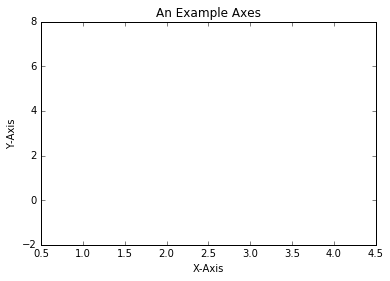

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111) # I'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes', ylabel='Y-Axis', xlabel='X-Axis')


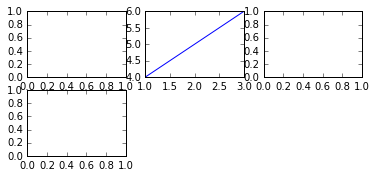

In [31]:
fig = plt.figure() #think of this like a container to put all of your plots on
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax2.plot([1,2,3],[4,5,6])

![pics of subplots](plot_subplot-grid_1.png)

Notice that subplot index starts at 1 and not 0 which is some weird shit that matplotlib decided would be a great idea in that it mimics how matlab indexes plots. Roll with it.  You can also call the plots using 0 based indexing using this sytax:

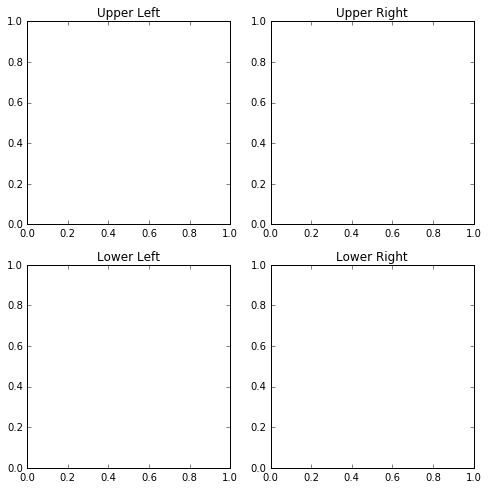

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ax[0,0].set(title='Upper Left')
ax[0,1].set(title='Upper Right')
ax[1,0].set(title='Lower Left')
ax[1,1].set(title='Lower Right')

We are going to go through this next block of code line by line to figure out what's going on.

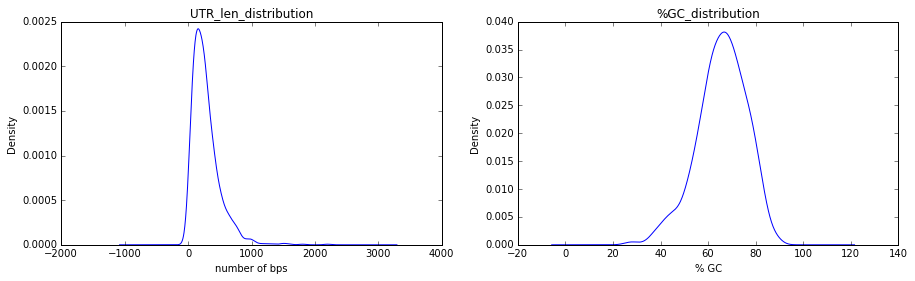

In [33]:
fig, axs = plt.subplots(ncols=2, figsize=(15,4))
ax1 = top_genes['UTR_len'].plot(kind='kde', ax=axs[0])
ax1.set_title('UTR_len_distribution')
ax1.set_xlabel('number of bps')
ax2 = top_genes['GC_content'].plot(kind = 'kde', ax=axs[1])
ax2.set_title('%GC_distribution')
ax2.set_xlabel('% GC')

Now if we want to see whether there is a change in the distribution we can overlay the whole gene set.

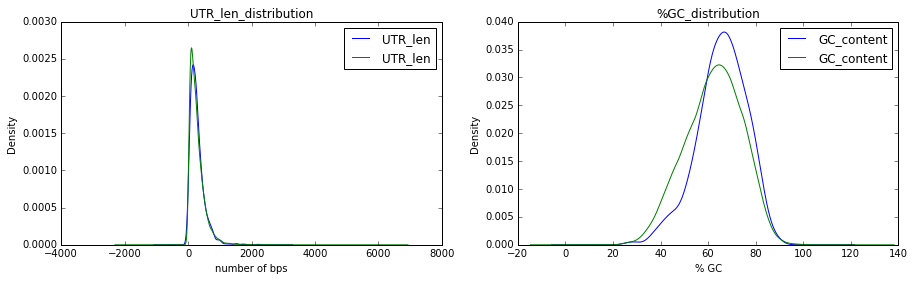

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(15,4))
ax1 = top_genes['UTR_len'].plot(kind='kde', ax=axs[0], legend=True)
ax1b = features['UTR_len'].plot(kind='kde', ax=axs[0], legend=True)
ax1.set_title('UTR_len_distribution')
ax1.set_xlabel('number of bps')
ax2 = top_genes['GC_content'].plot(kind = 'kde', ax=axs[1], legend=True)
ax2b = features['GC_content'].plot(kind = 'kde', ax=axs[1], legend=True)
ax2.set_title('%GC_distribution')
ax2.set_xlabel('% GC')
fig.savefig('test_figure.png')

## Apply method

Now we are going to cleanup the folding energy for the 5'UTR using the apply method.  We will apply it to a series, however, if given an axis arguement, it can also be applied to a dataframe.

In [35]:
features['hg19.foldUtr5.energy']

hg19.refGene.name2
A1CF                           -105.3
A4GNT                           -52.1
AADAC                           -13.9
AADACL2                        -19.99
AADACL3                        -78.46
AADAT                          -156.9
AAED1                           -13.1
AAK1                    -230.3,-57.9,
AAMDC             -11.62,-32.1,-48.6,
AAMP                           -33.3,
AARD                             -2.9
AASDH           -42.26,-47.52,-42.26,
AASDHPPT                  -73.9,-3.7,
AASS                    -14.32,-48.7,
ABCA1                         -175.51
ABCA12                          -60.6
ABCA13                       -4.1,-6,
ABCA2            -93.8,-567.83,-93.8,
ABCA4                          -40.6,
ABCB1                          -158.3
ABCB10                          -18.4
ABCB11            -30.8,-109.8,-39.2,
ABCB4                           -26.9
ABCB5                         -132.43
ABCB6                        -792.33,
ABCB7                          

I want to get the maximum value out of each row for this column.  This would require a for loop in pyton in order to unpack the list of values in each row.  But, we are working in pandas and there should always (or most of the time) be a work around to get out of for loops.  Here's an example for one row of what we are trying to achieve:

In [36]:
pd.Series(features['hg19.foldUtr5.energy']['AAK1'].split(',')).max()

'-57.9'

In [37]:
features['hg19.foldUtr5.energy'].apply(lambda item: pd.Series(item.split(',')).max())

hg19.refGene.name2
A1CF         -105.3
A4GNT         -52.1
AADAC         -13.9
AADACL2      -19.99
AADACL3      -78.46
AADAT        -156.9
AAED1         -13.1
AAK1          -57.9
AAMDC         -48.6
AAMP          -33.3
AARD           -2.9
AASDH        -47.52
AASDHPPT      -73.9
AASS          -48.7
ABCA1       -175.51
ABCA12        -60.6
ABCA13           -6
ABCA2         -93.8
ABCA4         -40.6
ABCB1        -158.3
ABCB10        -18.4
ABCB11        -39.2
ABCB4         -26.9
ABCB5       -132.43
ABCB6       -792.33
ABCB7         -7.72
ABCB8         -41.3
ABCC10       -103.1
ABCC2         -25.3
ABCC5         -65.8
             ...   
ZP4          -95.02
ZPBP          -35.3
ZPLD1         -74.9
ZPR1           -6.2
ZRANB1        -70.5
ZRANB2        -97.1
ZRANB3        -66.4
ZRSR2         -20.9
ZSCAN12       -65.2
ZSCAN16       -25.2
ZSCAN20       -55.9
ZSCAN21       -39.3
ZSCAN23         -55
ZSCAN25       -93.6
ZSCAN26       -93.6
ZSCAN31     -166.37
ZSCAN9       -62.51
ZSWIM2          -11
Z